In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import numpy as np
import pandas as pd
import datetime

from IPython.display import display

np.set_printoptions(suppress=True)

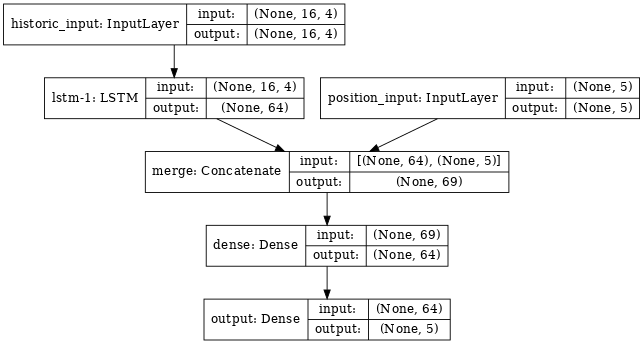

KeyboardInterrupt: 

In [33]:
from stocks import Stocks
from agents.dqn import DQN
from agents.drqn import DRQN
from agents.reinforce import REINFORCE
from agents.uniform import Uniform
from environment import Env
from simulation import Simulation
from utils import *
from visualizations import *
from logger import Logger

tickers = ['GE', 'JPM', 'MSFT', 'GS']

train_stocks = Stocks(tickers, start='2000-1-1', end='2004-12-31', trading_freq='W-FRI')
test_stocks = Stocks(tickers, start='2005-1-1', end='2019-09-30', trading_freq='W-FRI')

# train_stocks = Stocks(tickers, start='2016-6-1', end='2018-03-09', trading_freq='W-FRI')
# test_stocks = Stocks(tickers, start='2018-03-15', end='2020-03-03', trading_freq='W-FRI')

run = f'run_{datetime.datetime.now().strftime("%Y-%m-%d-%H:%M:%S")}'

agent     = DRQN()
train_env = Env(stocks=train_stocks, window_size=16, fee=0.002, logger=Logger(name=f'{run}_train'))
test_env  = Env(stocks=test_stocks, window_size=16, fee=0.002, logger=Logger(name=f'{run}_test'))

sim = Simulation(agent, train_env, test_env)
display(agent.print_model())
sim.run(10_000)

In [38]:
positions, rewards, returns, q_values = agent.load_logs(90, 'training')

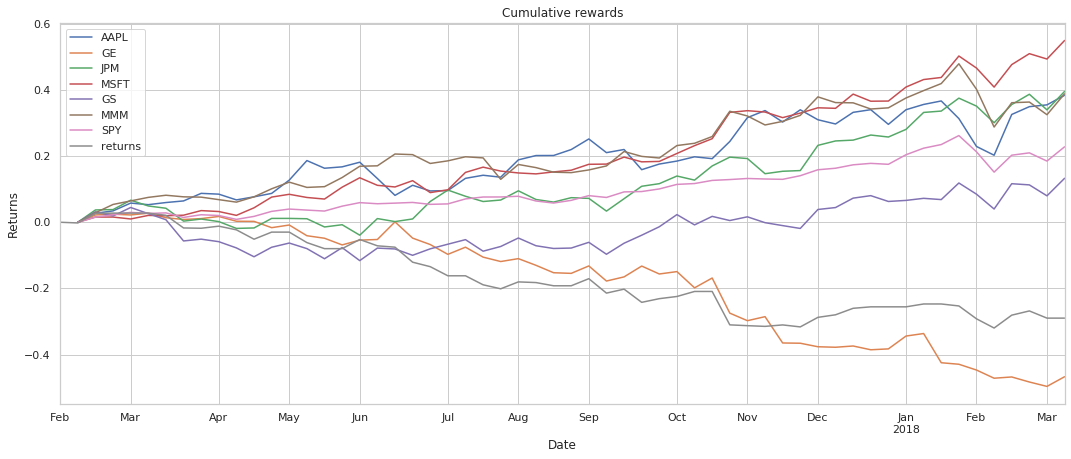

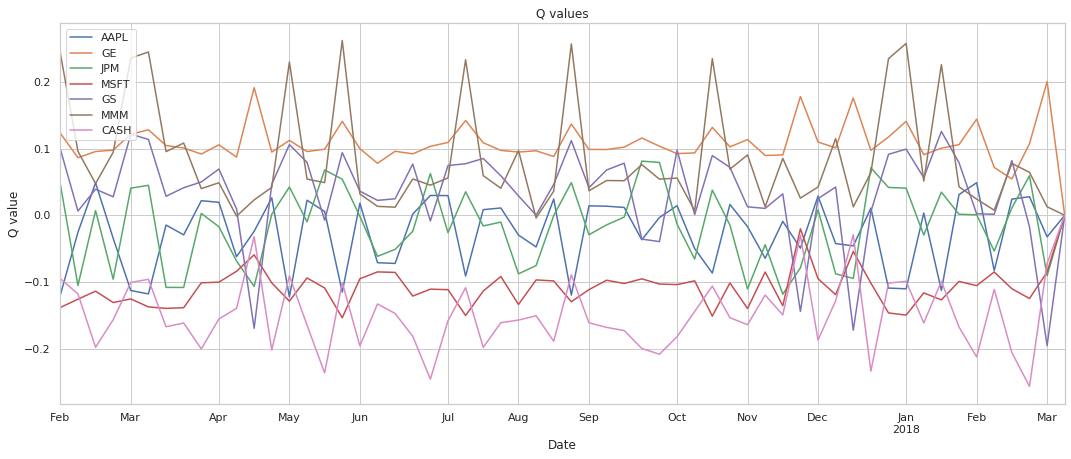

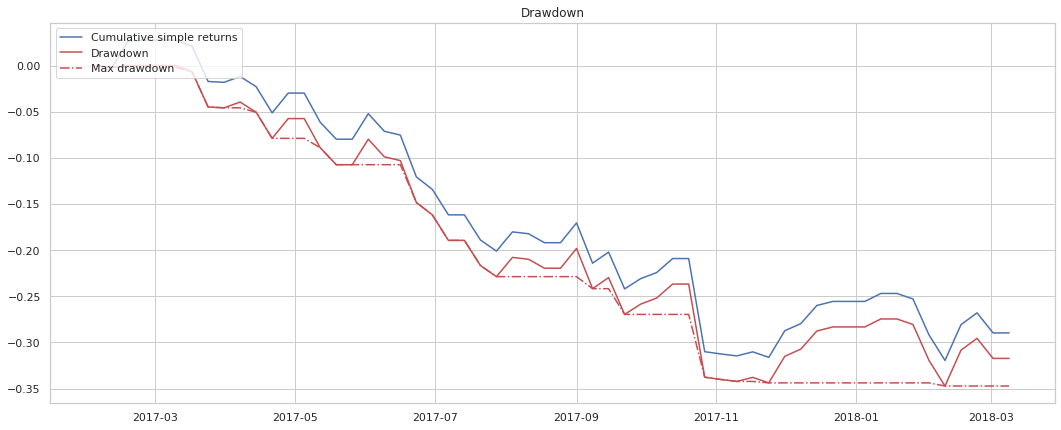

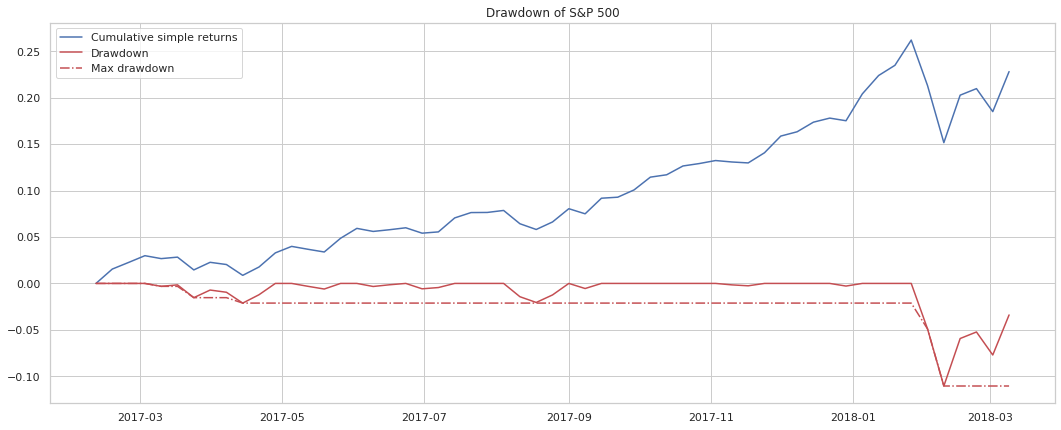

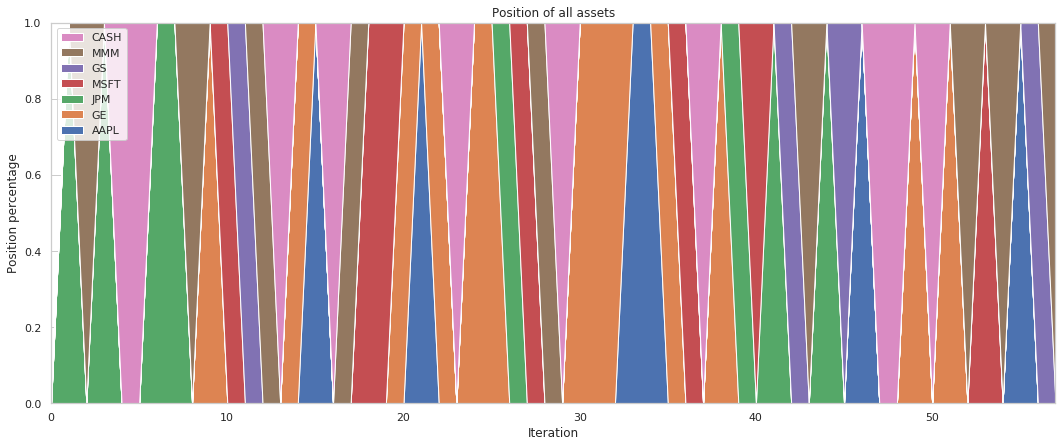

,Sharpe ratio
AAPL,1.63539
GE,-2.10485
JPM,1.88054
MSFT,3.04237
GS,0.695429
MMM,1.82683
SPY,1.9789
returns,-1.48934


In [33]:
def plot_results(episode, mode):
    # Open the log file
    positions, rewards, returns, q_values = agent.load_logs(episode, mode)
    
    dates = positions[np.sum(positions, 1) != 0].index
    
    start = dates[0].strftime("%Y-%m-%d")
    end = dates[-1].strftime("%Y-%m-%d")
    
    # Get the baseline stocks
    baseline = Stocks([*tickers, 'SPY'], start=start, end=end)
    
    # Plot cumulative rewards
    plot_cumulative_returns(pd.concat([simple_returns(baseline.prices), returns], 1))
    
    # Plot q values
    plot(q_values, title='Q values', ylabel='Q value')
    
    # Drawdown plot
    plot_drawdown(returns)
    
    # Drawdown of the S&P index
    plot_drawdown(simple_returns(baseline.prices['SPY']), title='Drawdown of S&P 500')
    
    # Position percentages
    plot_positions(positions)
    
    return show_sharpe_ratio(pd.concat([simple_returns(baseline.prices), returns], 1))
    
plot_results(0, 'training')